In [34]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 

df = pd.read_csv('basketball_draft.csv')
df.head()


,draftYear,draftRound,draftSelection,draftOverall,tmID,firstName,lastName,suffixName,playerID,draftFrom,lgID
0,1967,0,0,0,ANA,Darrell,Hardy,NaN,hardyda01,Baylor,ABA
1,1967,0,0,0,ANA,Bob,Krulish,NaN,NaN,Pacific,ABA
2,1967,0,0,0,ANA,Bob,Lewis,NaN,lewisbo01,North Carolina,ABA
3,1967,0,0,0,ANA,Mike,Lynn,NaN,lynnmi01,UCLA,ABA
4,1967,0,0,0,ANA,Tom,Workman,NaN,workmto01,Seattle,ABA


In [35]:
df = df.drop_duplicates()

In [36]:
df = df.drop(columns="playerID")

In [37]:
df.head()

,draftYear,draftRound,draftSelection,draftOverall,tmID,firstName,lastName,suffixName,draftFrom,lgID
0,1967,0,0,0,ANA,Darrell,Hardy,NaN,Baylor,ABA
1,1967,0,0,0,ANA,Bob,Krulish,NaN,Pacific,ABA
2,1967,0,0,0,ANA,Bob,Lewis,NaN,North Carolina,ABA
3,1967,0,0,0,ANA,Mike,Lynn,NaN,UCLA,ABA
4,1967,0,0,0,ANA,Tom,Workman,NaN,Seattle,ABA


In [38]:
df = df[(df['draftRound'] != 0)&(df['draftSelection'] != 0)&(df['draftOverall'] != 0)]

In [39]:
df = df[(df['draftYear'] > 1977)]

In [40]:
df.head()

,draftYear,draftRound,draftSelection,draftOverall,tmID,firstName,lastName,suffixName,draftFrom,lgID
5601,1978,1,1,1,POR,Mychal,Thompson,NaN,Minnesota,NBA
5602,1978,1,2,2,KCK,Phil,Ford,NaN,North Carolina,NBA
5603,1978,1,3,3,IND,Rick,Robey,NaN,Kentucky,NBA
5604,1978,1,4,4,NYK,Micheal,Richardson,NaN,Montana,NBA
5605,1978,1,5,5,GSW,Purvis,Short,NaN,Jackson State,NBA


In [41]:
df['draftYear'] = pd.to_datetime(df['draftYear'], format='%Y')

# Extract years from the datetime column
df['draftYear'] = df['draftYear'].dt.year

# Count the number of draft rounds by year
rounds_by_year = df.groupby('draftYear')['draftRound'].nunique()

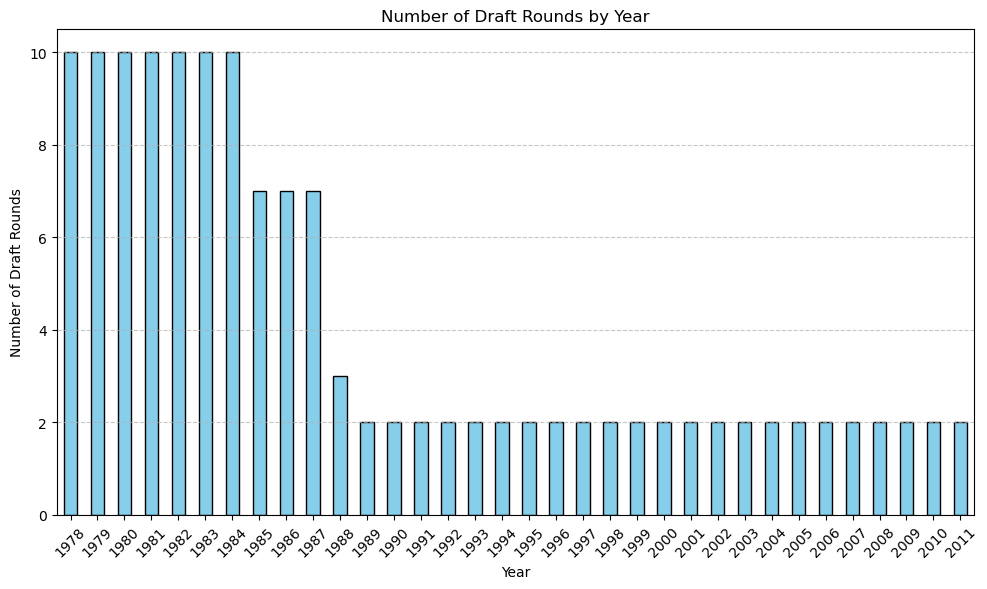

In [42]:
plt.figure(figsize=(10, 6))
rounds_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Draft Rounds by Year')
plt.xlabel('Year')
plt.ylabel('Number of Draft Rounds')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [43]:
df_since1994 = df[df['draftYear'] >= 1994]

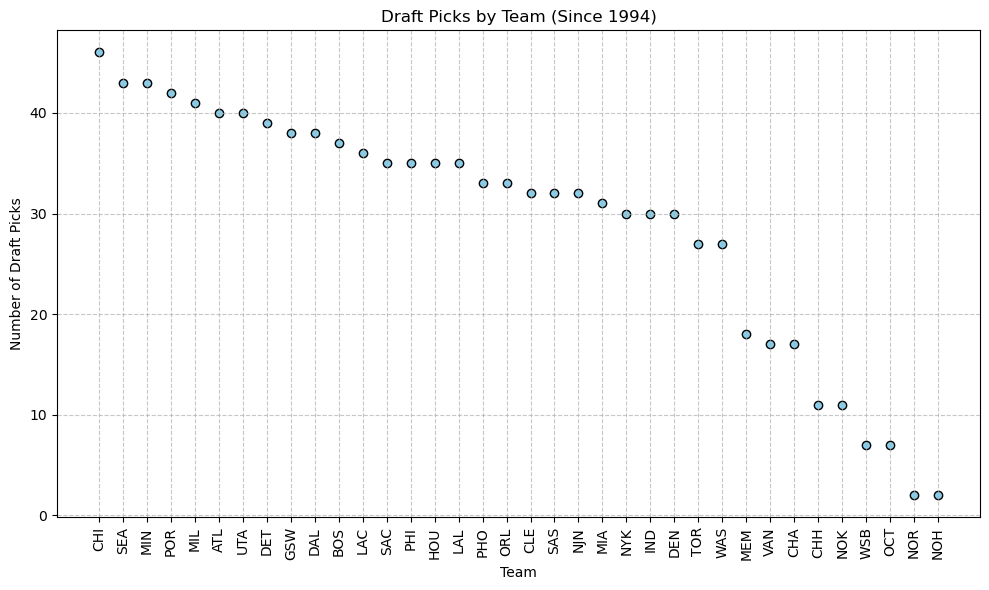

In [56]:
# Count the number of draft picks by team
draft_picks_by_team = df_since1994['tmID'].value_counts()

# Convert the Series to a DataFrame for plotting
team_df = draft_picks_by_team.reset_index()
team_df.columns = ['Team', 'Draft Picks']

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(team_df['Team'], team_df['Draft Picks'], color='skyblue', edgecolor='black')
plt.title('Draft Picks by Team (Since 1994)')
plt.xlabel('Team')
plt.ylabel('Number of Draft Picks')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [45]:
df_picks1990 = df[df['draftYear'] >= 1990]

In [49]:
draft_picks_fromSchools = df_picks1990['draftFrom'].value_counts()
top_10_schools = draft_picks_fromSchools.head(10)

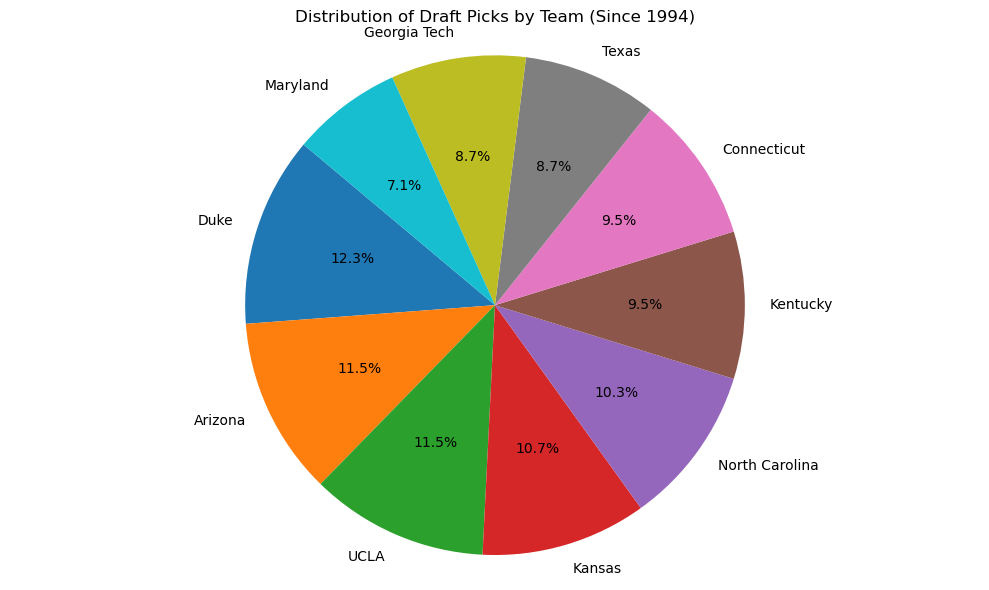

In [53]:
plt.figure(figsize=(10, 6))
top_10_schools.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Draft Picks by Team (Since 1994)')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()